<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/2_Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DSAI5102 — Tutorial 6

**Hypotheses Testing**
  
#### **Table of Contents**
1.   Basic Concepts
2.   Mathematical Foundation
3.   Discrete Variable Example
4.   Continuous Variable Example
5.   ROC Curve Analysis
6.   Common Mistakes and Considerations



#### **1. Basic Concepts**
**Null and Alternative Hypotheses**

Null Hypothesis: The hypothesis we presume to be true and seek evidence against, denoted as $H_0$. E.g., "The new drug has no effect," "There is no difference in conversion rate between two website versions."

Alternative Hypothesis: The hypothesis against the null, which we hope to support, denoted as $H_1$. E.g., "The new drug is effective," "Version A has a higher conversion rate than Version B."

**Error Types**

Type I Error: Falsely rejecting a true null hypothesis ($\alpha$)

Type II Error: Falsely failing to reject a false null hypothesis ($\beta$)

**p-value**

Probability of observing the current data or more extreme data given that the null hypothesis is true

#### **2. Mathematical Foundation**

**General Steps of Hypothesis Testing**
1. Formulate Hypotheses

$$
H_0: \theta\in\Theta_0 \quad \text { vs } \quad H_1: \theta \in \Theta_1
$$

e.g.
- Right-side testing
$$
H_0: \theta=\theta_0 \quad \text { vs } \quad H_1: \theta > \theta_0
$$
- Left-side testing
$$
H_0: \theta=\theta_0 \quad \text { vs } \quad H_1: \theta < \theta_0
$$
- Two-side testing
$$
H_0: \theta=\theta_0 \quad \text { vs } \quad H_1: \theta \neq \theta_1
$$


2. Choose Test Statistic

$$
T=T\left(X\right)
$$

3. Determine Rejection Region

$$
W, s.t. P(T\in W \mid H_0)\leq \alpha
$$

e.g.
- Right-side testing
$$
W=\{T: T \geq c\}
$$
- Left-side testing
$$
W=\{T: T \leq c\}
$$
- Two-side testing
$$
W=\{T:T≤c_1\}∪\{T:T≥c_2\}
$$

4. Calculate $p$-value

$$
p=P\left(t_{obs} \in W^* \mid H_0\right)
$$

e.g.
- Right-side testing
$$
p=P\left(T \geq t_{obs} \mid H_0\right)
$$
- Left-side testing
$$
p=P\left(T \leq t_{obs} \mid H_0\right)
$$
- Two-side testing
$$
p=2\times \rm{min}\left(P\left(T \leq t_{obs} \mid H_0\right),P\left(T \geq t_{obs} \mid H_0\right)\right)
$$

5. Make Decision
- If $t_{obs}\in W$, reject $H_0$; Otherwise, fail to reject $H_0$
- If $p < \alpha$, reject $H_0$; Otherwise, fail to reject $H_0$



**Types of error:**

**(1) Type I Error**

Definition: Rejecting the null hypothesis $H_0$ when it is actually true.

Layman's Term: A "false positive" or "false alarm." You detect an effect that does not exist.

Examples:

- Courtroom: Convicting an innocent person.

- Medical Test: Diagnosing a disease in a healthy person.

- A/B Testing: Concluding a new feature is significantly better when it actually isn't.

Probability: The probability of a Type I error is denoted by $\alpha$.

- This $\alpha$ is the "significance level" you set before conducting the test.

- Common choices are 0.05 (5%) or 0.01 (1%). Setting $\alpha=0.05$ means you accept a 5% risk of rejecting a true null hypothesis.

Control: Researchers directly control the risk of a Type I error by choosing the value of $\alpha$. It's the maximum "false alarm" risk we are willing to take.

**(2) Type II Error**

Definition: Failing to reject the null hypothesis $H_0$ when it is actually false.

Layman's Term: A "false negative" or "miss." You fail to detect a genuine effect.

Examples:

- Courtroom: Acquitting a guilty person.

- Medical Test: Failing to diagnose a disease in a sick person.

- A/B Testing: Concluding there is no significant difference when the new version is actually better.

Probability: The probability of a Type II error is denoted by $\beta$.

Control: Controlling $\beta$ is less straightforward than $\alpha$. It is influenced by:

- Effect Size: A larger true effect is easier to detect, resulting in a smaller $\beta$.

- Sample Size: A larger sample size increases the test's ability to detect an effect, reducing $\beta$.

- Significance Level $\alpha$: For a given setup, decreasing $\alpha$ will increase $\beta$. This is a trade-off.

**Statistical Power**

A concept intimately linked to Type II error is Statistical Power.

- Definition: The probability of correctly rejecting the null hypothesis when it is false.

- Calculation: Power = 1 - $\beta$

- Importance: High power means your test has a strong chance of detecting a real effect. When designing experiments, we typically aim for a power of 80% or higher.

**The Relationship: A Fundamental Trade-off**

Type I and Type II errors have an inverse relationship. Reducing the risk of one typically increases the risk of the other, similar to the trade-off in a justice system between "convicting the innocent" and "letting the guilty go free."

The following table is a crucial tool for visualizing this:


| Decision &emsp;\ &emsp; True State | &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $H_0$ is TRUE &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; | &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $H_0$ is FALSE &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; |
| :--- | :--- | :--- |
| **Reject $H_0$** | **Type I Error**<br><br>  $\mathbb{P}(\text{Reject }H_0 \mid H_0\text{ true}) = \alpha$ | **Power**<br><br> $\mathbb{P}(\text{Reject }H_0 \mid H_0\text{ false}) = 1-\beta$ |
| **Fail to Reject $H_0$** | **Correct**<br><br>$\mathbb{P}(\text{Accept }H_0 \mid H_0\text{ true}) = 1-\alpha$ | **Type II Error**<br><br>$\mathbb{P}(\text{Accept }H_0 \mid H_0\text{ false}) = \beta$ |

#### **3. Discrete Variable Example**
**Problem: Test whether a coin is fair**

A casino introduced new game coins and needs to test whether these coins are fair. The quality control department decided to conduct a statistical test.

Independently toss coin 100 times with heads probability of 0.6.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 3. Discrete Variable Example (Discrete Variable Example)

### Problem: Test whether a coin is fair

def binomial_test_custom(x, n, p, alternative='two-sided'):
    """
    Custom implementation of binomial test
    """
    if alternative == 'two-sided':
        # Two-sided test: min of left and right tail probabilities
        left_tail = stats.binom.cdf(x, n, p)
        right_tail = 1 - stats.binom.cdf(x-1, n, p)
        p_value = 2 * min(left_tail, right_tail)
    elif alternative == 'less':
        p_value = stats.binom.cdf(x, n, p)
    elif alternative == 'greater':
        p_value = 1 - stats.binom.cdf(x-1, n, p)
    return min(p_value, 1.0)  # Ensure p-value doesn't exceed 1


In [ ]:
# Simulate coin toss experiment
np.random.seed(123)
n_tosses = 100  # Number of coin tosses
p_fair = 0.5    # Probability for fair coin

# Generate data: 1 represents heads, 0 represents tails
# Using a biased coin with p=0.6 for demonstration
coin_tosses = np.random.binomial(1, 0.6, n_tosses)
heads_count = np.sum(coin_tosses)

print(f"Number of coin tosses: {n_tosses}")
print(f"Number of heads: {heads_count}")
print(f"Proportion of heads: {heads_count/n_tosses:.3f}")

Number of coin tosses: 100
Number of heads: 62
Proportion of heads: 0.620


In [ ]:
# Perform binomial test
p_value = binomial_test_custom(heads_count, n=n_tosses, p=0.5, alternative='two-sided')
print(f"\nBinomial test p-value: {p_value:.4f}")


Binomial test p-value: 0.0210


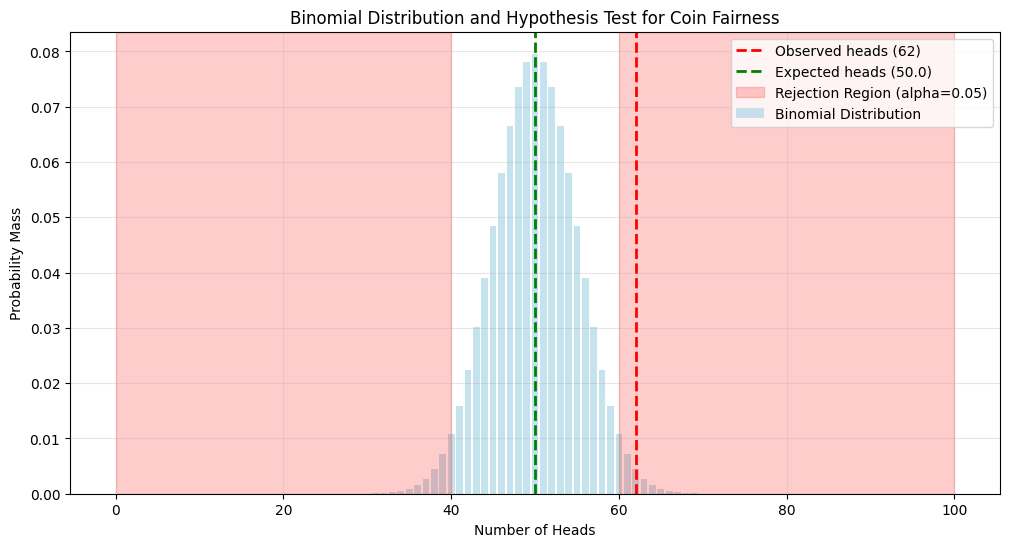

In [ ]:
# Visualize the binomial distribution under null hypothesis
x_values = np.arange(0, n_tosses+1)
y_values = stats.binom.pmf(x_values, n_tosses, p_fair)

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, alpha=0.7, color='lightblue', label='Binomial Distribution')
plt.axvline(heads_count, color='red', linestyle='--', linewidth=2,
           label=f'Observed heads ({heads_count})')
plt.axvline(n_tosses * p_fair, color='green', linestyle='--', linewidth=2,
           label=f'Expected heads ({n_tosses * p_fair})')

# Mark rejection regions (alpha=0.05)
critical_low = stats.binom.ppf(0.025, n_tosses, p_fair)
critical_high = stats.binom.ppf(0.975, n_tosses, p_fair)

plt.axvspan(0, critical_low, alpha=0.2, color='red', label='Rejection Region (alpha=0.05)')
plt.axvspan(critical_high, n_tosses, alpha=0.2, color='red')

plt.xlabel('Number of Heads')
plt.ylabel('Probability Mass')
plt.title('Binomial Distribution and Hypothesis Test for Coin Fairness')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Detailed analysis
print("\n=== Detailed Analysis ===")
expected_heads = n_tosses * p_fair
print(f"Expected number of heads under H0: {expected_heads}")
print(f"Observed number of heads: {heads_count}")
print(f"Absolute difference: {abs(heads_count - expected_heads):.1f}")

# Calculate confidence interval for the proportion
from statsmodels.stats.proportion import proportion_confint
ci_low, ci_high = proportion_confint(heads_count, n_tosses, alpha=0.05, method='normal')
print(f"95% CI for true heads probability: [{ci_low:.3f}, {ci_high:.3f}]")

# Conclusion
alpha = 0.05
print(f"\n=== Conclusion ===")
if p_value < alpha:
    print(f"At significance level alpha={alpha}, we REJECT the null hypothesis")
    print("There is statistically significant evidence that the coin is NOT fair")
    if heads_count > expected_heads:
        print("The coin appears to be biased towards HEADS")
    else:
        print("The coin appears to be biased towards TAILS")
else:
    print(f"At significance level alpha={alpha}, we FAIL TO REJECT the null hypothesis")
    print("There is insufficient evidence to conclude that the coin is unfair")
    print("The observed results are consistent with a fair coin")


=== Detailed Analysis ===
Expected number of heads under H0: 50.0
Observed number of heads: 62
Absolute difference: 12.0
95% CI for true heads probability: [0.525, 0.715]

=== Conclusion ===
At significance level alpha=0.05, we REJECT the null hypothesis
There is statistically significant evidence that the coin is NOT fair
The coin appears to be biased towards HEADS


**Formulate Hypotheses**

$$
\begin{array}{ll}
H_0: p=0.5 & \text { (The coin is fair) } \\
H_1: p \neq 0.5 & \text { (The coin is biased) }
\end{array}
$$


**Select Test Statistic**

Binomial test with test statistic $ X =$ number of heads

Given parameters:
- $ n=100 $ (number of coin tosses)
- $ p_0 =0.5 $ (probability under null hypothesis)
- $x_{\text{obs}} = 62$ (observed number of heads)

**Determine Sampling Distribution**

Under $H_0$, $X \sim \text{Binomial}(100, 0.5)$




**Calculate $p$-value (Two-sided Test)**

$$
\begin{aligned}
P(X \leq 62) & =\sum_{k=0}^{62}\binom{100}{k}(0.5)^k(0.5)^{100-k}=0.9940 \\
P(X \geq 62) & =1-P(X \leq 61)=0.0105 \\
p & =2 \times \min [P(X \leq 62), P(X \geq 62)]=2 \times 0.0105=0.0210
\end{aligned}
$$

**Determine Rejection Region**

For $ \alpha =0.05 $, critical values are:

Lower critical: $c_{\text{lower}} = 40 (P(X \leq 40) \approx 0.028)$

Upper critical: $c_{\text{upper}} = 60 (P(X \geq 60) \approx 0.028)$

**Make Decision**

Since $p=0.0210 < 0.05 $, reject the null hypothesis.

#### **4. Continuous Variable Example**
**Problem: Test whether new teaching method improves student performance**

An educational institution developed a new mathematics teaching method claiming to improve students' math scores significantly. To verify this claim, researchers conducted a randomized controlled trial.

Randomly generate two sets of normally distributed random variables with means of 75 and 78 and variances of 100, each group contains 100 samples.

In [ ]:
from math import sqrt
# Generate simulated data
np.random.seed(42)
traditional_method = np.random.normal(75, 10, 100)  # Traditional method
new_method = np.random.normal(78, 10, 100)         # New method

print(f"Traditional method average: {traditional_method.mean():.2f}")
print(f"New method average: {new_method.mean():.2f}")
print(f"Traditional method variance: {traditional_method.var():.2f}")
print(f"New method variance: {new_method.var():.2f}")

# Independent samples t-test
s_p2=(99*new_method.var()+99*traditional_method.var())/198
s_p=sqrt(s_p2)
print(f"\ns_p: {s_p:.4f}")
t_stat, p_value = stats.ttest_ind(new_method, traditional_method)
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Traditional method average: 73.96
New method average: 78.22
Traditional method variance: 81.65
New method variance: 90.04

s_p: 9.2653

t-statistic: 3.2360
p-value: 0.0014


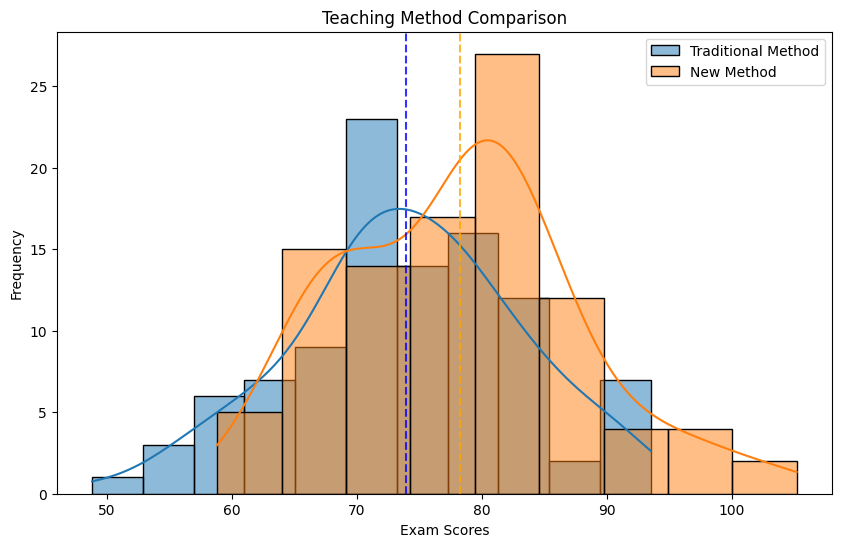

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(traditional_method, kde=True, alpha=0.5, label='Traditional Method')
sns.histplot(new_method, kde=True, alpha=0.5, label='New Method')
plt.axvline(traditional_method.mean(), color='blue', linestyle='--', alpha=0.8)
plt.axvline(new_method.mean(), color='orange', linestyle='--', alpha=0.8)
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Teaching Method Comparison')
plt.show()

In [ ]:
# Conclusion
alpha = 0.05
if p_value < alpha:
    print(f"\nAt significance level {alpha}, reject the null hypothesis")
    print("Evidence suggests the new teaching method significantly improves student performance")
else:
    print(f"\nAt significance level {alpha}, fail to reject the null hypothesis")
    print("Insufficient evidence that the new teaching method improves performance")


At significance level 0.05, reject the null hypothesis
Evidence suggests the new teaching method significantly improves student performance


**Formulate Hypotheses**

$$
\begin{array}{ll}
H_0: \mu_{\text {new }}=\mu_{\text {traditional }} & \text { (No difference in teaching methods) } \\
H_1: \mu_{\text {new }}>\mu_{\text {traditional }} & \text { (New method is better) }
\end{array}
$$


**Select Test Statistic**

Independent samples t-test statistic:

$$
t=\frac{\bar{X}_1-\bar{X}_2}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$


Where:
- $\bar X_1=78.22 $ (New method sample mean)
- $\bar X_2=73.96 $ (Traditional method sample mean)
- $s_1^2=90.04 $ (New method sample variance)
- $s_2^2=81.65 $ (Traditional method sample variance)
- $n_1 = n_2 = 100$ (Sample sizes)

**Calculate Pooled Standard Deviation**

$$
\begin{gathered}
s_p^2=\frac{\left(n_1-1\right) s_1^2+\left(n_2-1\right) s_2^2}{n_1+n_2-2}=85.8456 \\
s_p=\sqrt{85.8456}=9.2653
\end{gathered}
$$


**Calculate Test Statistic**

$$
t=3.2360
$$


**Determine Sampling Distribution**

Under $H_0$, $t \sim t_{198}$ (t-distribution with 198 degrees of freedom)

**Calculate $p$-value**

$$
p=P\left(t>3.2360 \mid H_0\right)=0.0014
$$


**Make Decision**

Set significance level $\alpha =0.05 $
Since $ p=0.0014<0.05 $, reject the null hypothesis.

#### **5. ROC curve analysis**

**1. Basic Concepts of ROC Curve**

ROC (Receiver Operating Characteristic) curve is a graphical tool for evaluating the performance of binary classifiers, originally developed in signal detection theory and now widely used in machine learning, medical diagnosis, and other fields.

Core Definitions:
- True Positive Rate (TPR): Also known as Sensitivity or Recall

$$
T P R=\frac{T P}{T P+F N}
$$

- False Positive Rate (FPR): 1 - Specificity

$$
F P R=\frac{F P}{F P+T N}
$$

| Decision &emsp;\ &emsp; True State | &emsp; $H_0$ is TRUE &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; | &emsp; $H_0$ is FALSE &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; |
| :--- | :--- | :--- |
| &emsp;&emsp;&emsp;&emsp;**Reject $H_0$** | &emsp;&emsp;&emsp;**FP** | &emsp;&emsp;&emsp;**TP** |
| &emsp;&emsp;&emsp;**Fail to Reject $H_0$** | &emsp;&emsp;&emsp;**TN** | &emsp;&emsp;&emsp;**FN** |

**2. Mathematical Foundation of ROC Curve**

ROC Space:
- x-axis: False Positive Rate $(\mathrm{FPR}) \in[0,1]$
- $y$-axis: True Positive Rate $(\mathrm{TPR}) \in[0,1]$
- Each point corresponds to a (FPR, TPR) pair at a specific classification threshold

Curve Construction:
For a given classifier and test set, systematically vary the classification threshold (from 1 to 0), calculate TPR and FPR at each threshold, and connect these points to form the ROC curve.

AUC (Area Under Curve):

$$
A U C=\int_0^1 T P R(F P R) d(F P R)
$$


Statistical meaning of AUC: The probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

**3. Theoretical Properties of ROC Curve**

Ideal Cases:
- Perfect classifier: ROC curve passes through $(0,1), \mathrm{AUC}=1$
- Random classifier: ROC curve is the diagonal line, $\mathrm{AUC}=0.5$
- Real classifier: ROC curve above the diagonal

Key Points Explanation:
- (0,0): Threshold = 1, all instances predicted negative, $\mathrm{TPR}=0, \mathrm{FPR}=0$
- (1,1): Threshold = 0, all instances predicted positive, TPR=1, FPR=1
- (0,1): Perfect classification, complete separation of positive and negative instances

**4. Advantages of ROC Curve**
1. Threshold Invariance: Independent of specific classification threshold
2. Class Distribution Invariance: Insensitive to class imbalance
3. Comprehensiveness: Shows classifier performance at all possible thresholds
4. Comparability: Allows direct comparison between different classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


Generate a synthetic dataset with 1,000 samples and 20 features, where only 10 features contain meaningful information for classification.

In [ ]:
# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=2,
                          n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

Two distinct classifiers are trained on this data: **Logistic Regression** as a representative of linear models, and **Random Forest** as an example of ensemble methods.

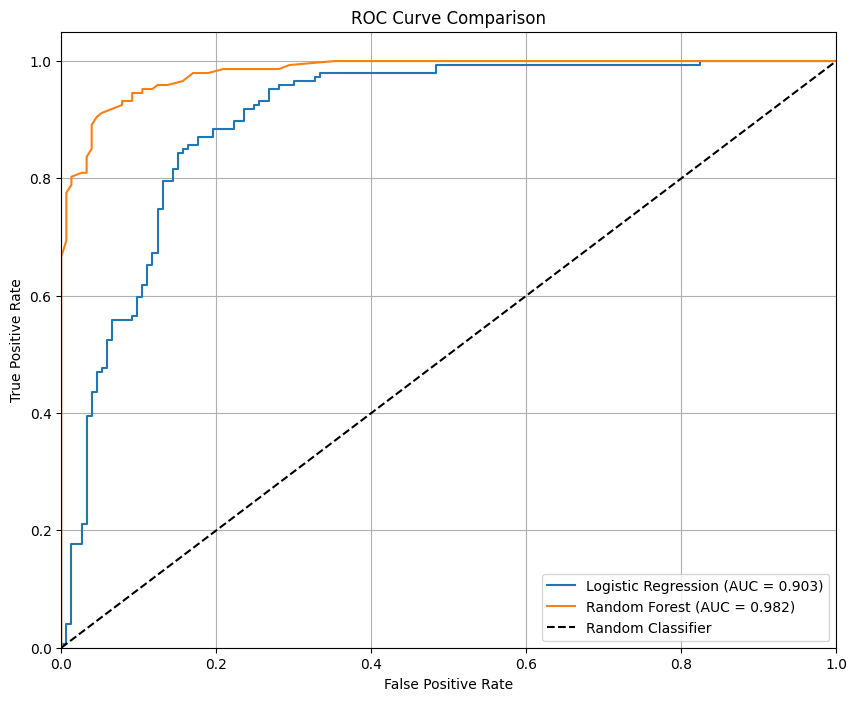

Logistic Regression AUC: 0.903
Random Forest AUC: 0.982


In [ ]:
# Train models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability predictions
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Calculate AUC scores
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")

We can see that, as the classification threshold varies from 0 to 1, each model generates a unique curve showing its ability to distinguish between classes.

The Random Forest typically demonstrates superior performance with a higher AUC (Area Under the Curve), indicating better overall discrimination power.

The **optimal threshold** calculation using Youden's J statistic:

identifies the point that maximizes both true positive rate and true negative rate simultaneously.

In [ ]:
# Find optimal threshold (Youden's J statistic)
lr_j_stats = lr_tpr - lr_fpr
optimal_idx = np.argmax(lr_j_stats)
optimal_threshold = _[optimal_idx]  # thresholds from roc_curve

print(f"Optimal threshold for Logistic Regression: {optimal_threshold:.3f}")
print(f"At this threshold - TPR: {lr_tpr[optimal_idx]:.3f}, FPR: {lr_fpr[optimal_idx]:.3f}")

Optimal threshold for Logistic Regression: 0.490
At this threshold - TPR: 0.871, FPR: 0.176


#### **6. Common Mistakes and Considerations**
**Common Mistakes**
1.  Confusing p-value with effect size

2.  Ignoring multiple comparison problems

3.  Data snooping bias

4.  Misinterpreting "fail to reject null hypothesis"

**Best Practices**
1.  Pre-specify hypotheses and testing methods

2.  Report effect sizes and confidence intervals

3.  Consider statistical power

4.  Understand business context and practical significance

In [ ]:
# Statistical power analysis example
from statsmodels.stats.power import TTestIndPower

# Parameter setup
effect_size = 0.5  # Medium effect
alpha = 0.05
power = 0.8

# Calculate required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha,
                                 power=power, ratio=1.0)
print(f"With effect size={effect_size}, alpha={alpha}, power={power}:")
print(f"Required sample size per group: {np.ceil(sample_size):.0f}")

With effect size=0.5, alpha=0.05, power=0.8:
Required sample size per group: 64
